# CAPEX of CHP plants

In [1]:
import os
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functions.general.utility import get_project_root
from functions.TEA import convert_currency_annual_average
from functions.TEA.scaling import CEPCI_scale
from functions.general import convert_system_size
from functions.general.curve_fitting.depreciated.polynomial_regression_model_builder import \
    get_polynomial_model_and_performance


### Load Data and data wrangling
Get all data into same base year and currency.

In [2]:
# Load and display data
root_dir = get_project_root()
data_file = "CAPEX_Gasification.csv"
data_file_path = os.path.join(root_dir, "data", data_file)
df_source = pd.read_csv(data_file_path)
df = df_source.copy()  # working copy of original dataframe
df_source


,Process Reference,Gas Cleaning Included,Power Generation Included,Type,CAPEX,Currency,Plant size [tonnes/hour],Plant size [MW feedstock LHV] or [MWh/hour],Plant size [MWth],Plant size [MWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference
0,Gasification unit + gas cleaning,True,False,fixed bed,1721500,EUR,NaN,5.0,NaN,1.100,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015
1,Gasification unit + gas cleaning,True,False,fixed bed,5324000,EUR,NaN,20.0,NaN,4.400,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015
2,Gasification unit + gas cleaning,True,False,fixed bed,8316000,EUR,NaN,35.0,NaN,7.700,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015
3,Bubbling fluidised bed gasifier,False,False,fluidised bed,660000,EUR,0.740000,NaN,0.4,0.400,2015,Italy,NaN,NaN,calculated plant size in tonnes/hour from 5320...,http://dx.doi.org/10.1016/j.fuproc.2014.11.003
4,Bubbling fluidised bed air gasifier + power pr...,True,True,fluidised bed,2430000,EUR,0.500000,NaN,NaN,0.500,2012,Italy,NaN,NaN,plant input also quoted as 3840 tonnes/year,http://dx.doi.org/10.1016/j.energy.2012.03.048
5,Biomass gasifier with rankine cycle + all aces...,True,True,fluidised bed,2073183,EUR,0.910000,NaN,NaN,NaN,2019,Mexico,NaN,NaN,"total costs, including installation, planning,...",http://dx.doi.org/10.1016/j.energy.2019.116095
6,Gasifier equipment cost only,False,False,fluidised bed,72380,USD,0.100000,NaN,NaN,0.419,2020,USA,NaN,NaN,This represents only 2.5% of the BIGCC plant's...,https://doi.org/10.1016/j.compchemeng.2020.106758
7,Indirect gasifier,False,False,fluidised bed,8000000,EUR,NaN,8.0,NaN,NaN,2003,Europe,0.72,3.800,Base equipment cost would be quoted CAPEX scal...,https://doi.org/10.1002/er.3038
8,Indirect gasifier with gas cleaning (17% of to...,True,False,fluidised bed,52816426,EUR,NaN,100.0,NaN,NaN,2003,Europe,NaN,NaN,83% of this is the cost for the gasifier; 17% ...,https://doi.org/10.1002/er.3038
9,Entrained flow steam Gasification,False,False,entrained flow,14933333,USD,20.833333,NaN,NaN,NaN,2007,USA,0.60,2.310,CAPEX for cleaning equipment has been removed;...,Process Design and Economics for Conversion of...


In [3]:
# Convert all values to same currency and update to most recent CEPCI value
updated_currency = "GBP"
updated_CEPCI_year = 2020
CAPEX_currency_scaled = []
CAPEX_currency_CEPCI_scaled = []

for row_no in df.index:
    CAPEX_currency_scaled.append(
        convert_currency_annual_average(value=df["CAPEX"][row_no], year=df["Reference Year"][row_no],
                                        base_currency=df["Currency"][row_no], converted_currency=updated_currency))
    CAPEX_currency_CEPCI_scaled.append(
        CEPCI_scale(base_year=df["Reference Year"][row_no], design_year=updated_CEPCI_year,
                    value=CAPEX_currency_scaled[row_no]))
print("Currency scaled values:", CAPEX_currency_scaled)
print("Currency and CEPCI scaled values:", CAPEX_currency_CEPCI_scaled)

Currency scaled values: [1387781.8010958906, 4291925.825753425, 6703917.19890411, 479318.76164383563, 1971294.3442622952, 1818665.4230317809, 56427.75334076503, 5536412.05479452, 36551687.19969534, 7459687.642073587, 11189531.712876713, 25296720.32876713, 40038295.02739727, 26810960.63013699, 42844093.23287672, 99307093.95178083, 566467.6273972603, 595517.2493150686, 2476480.268493151, 197315402.97260275, 69153496.86465755, 52737963.50794522]
Currency and CEPCI scaled values: [1439332.8001298292, 4451355.113500559, 6952943.111170293, 514355.1725614077, 2014793.6549721542, 1754929.893833154, 56427.75334076503, 8228871.151093845, 54327445.526910365, 8483371.462007934, 12725057.477053363, 28961085.258552134, 45838055.71732107, 30694671.347972505, 49050288.7653647, 112934885.10884859, 607874.2948453, 639047.3356065975, 2657501.7249006066, 224392754.61768207, 102784115.36475842, 78385405.9601922]


In [4]:
# Add (i) currency and (ii) currency + CEPCI scaled values to dataframe
currency_scaled_label = "CAPEX_" + updated_currency
currency_and_CEPCI_scaled_label = "CAPEX_" + updated_currency + "_CEPCI_" + str(updated_CEPCI_year)

df[currency_scaled_label] = CAPEX_currency_scaled
df[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled

# Also add to original dataframe
df_source[currency_scaled_label] = CAPEX_currency_scaled
df_source[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled

df

,Process Reference,Gas Cleaning Included,Power Generation Included,Type,CAPEX,Currency,Plant size [tonnes/hour],Plant size [MW feedstock LHV] or [MWh/hour],Plant size [MWth],Plant size [MWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Gasification unit + gas cleaning,True,False,fixed bed,1721500,EUR,NaN,5.0,NaN,1.100,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,1.387782e+06,1.439333e+06
1,Gasification unit + gas cleaning,True,False,fixed bed,5324000,EUR,NaN,20.0,NaN,4.400,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,4.291926e+06,4.451355e+06
2,Gasification unit + gas cleaning,True,False,fixed bed,8316000,EUR,NaN,35.0,NaN,7.700,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,6.703917e+06,6.952943e+06
3,Bubbling fluidised bed gasifier,False,False,fluidised bed,660000,EUR,0.740000,NaN,0.4,0.400,2015,Italy,NaN,NaN,calculated plant size in tonnes/hour from 5320...,http://dx.doi.org/10.1016/j.fuproc.2014.11.003,4.793188e+05,5.143552e+05
4,Bubbling fluidised bed air gasifier + power pr...,True,True,fluidised bed,2430000,EUR,0.500000,NaN,NaN,0.500,2012,Italy,NaN,NaN,plant input also quoted as 3840 tonnes/year,http://dx.doi.org/10.1016/j.energy.2012.03.048,1.971294e+06,2.014794e+06
5,Biomass gasifier with rankine cycle + all aces...,True,True,fluidised bed,2073183,EUR,0.910000,NaN,NaN,NaN,2019,Mexico,NaN,NaN,"total costs, including installation, planning,...",http://dx.doi.org/10.1016/j.energy.2019.116095,1.818665e+06,1.754930e+06
6,Gasifier equipment cost only,False,False,fluidised bed,72380,USD,0.100000,NaN,NaN,0.419,2020,USA,NaN,NaN,This represents only 2.5% of the BIGCC plant's...,https://doi.org/10.1016/j.compchemeng.2020.106758,5.642775e+04,5.642775e+04
7,Indirect gasifier,False,False,fluidised bed,8000000,EUR,NaN,8.0,NaN,NaN,2003,Europe,0.72,3.800,Base equipment cost would be quoted CAPEX scal...,https://doi.org/10.1002/er.3038,5.536412e+06,8.228871e+06
8,Indirect gasifier with gas cleaning (17% of to...,True,False,fluidised bed,52816426,EUR,NaN,100.0,NaN,NaN,2003,Europe,NaN,NaN,83% of this is the cost for the gasifier; 17% ...,https://doi.org/10.1002/er.3038,3.655169e+07,5.432745e+07
9,Entrained flow steam Gasification,False,False,entrained flow,14933333,USD,20.833333,NaN,NaN,NaN,2007,USA,0.60,2.310,CAPEX for cleaning equipment has been removed;...,Process Design and Economics for Conversion of...,7.459688e+06,8.483371e+06


In [5]:
print("Comparison of most frequently used plant size measures:")
print("Plant size [tonnes/hour]:", df["Plant size [tonnes/hour]"].count())
print("Plant size [MW feedstock LHV]:", df["Plant size [MW feedstock LHV] or [MWh/hour]"].count())
print("Plant size [MWth]:", df["Plant size [MWth]"].count())
print("Plant size [MWel]:", df["Plant size [MWel]"].count())


Comparison of most frequently used plant size measures:
Plant size [tonnes/hour]: 13
Plant size [MW feedstock LHV]: 8
Plant size [MWth]: 1
Plant size [MWel]: 9


# Convert system size units to uniform format

In [6]:
# Fill in plant size [tonnes/hour] data
for count, value in enumerate(df_source["Plant size [tonnes/hour]"]):
    if math.isnan(value):
        plant_size_kWh_per_hour_feedstock = df.loc[count, "Plant size [MW feedstock LHV] or [MWh/hour]"] * 1000
        plant_size_MWel = df.loc[count, "Plant size [MWel]"]

        print(plant_size_kWh_per_hour_feedstock,"kWh/hour or", plant_size_MWel, "MWel")

        if not math.isnan(plant_size_kWh_per_hour_feedstock):  # replace based on plant_size_MW_feedstock first
            print("1st")

            converted_value = convert_system_size(value=plant_size_kWh_per_hour_feedstock,
                                                  input_units="kWh/hour",
                                                  output_units="tonnes/hour")
        else:
            if not math.isnan(plant_size_MWel):  # otherwise replace based on plant_size_MWel
                converted_value = convert_system_size(value=plant_size_MWel,
                                                      input_units="MWel",
                                                      output_units="tonnes/hour")
            else:  # no suitable reference value to convert from - leave as nan
                converted_value = np.NAN
        # populate data frame
        df.loc[count, ["Plant size [tonnes/hour]"]] = converted_value
df

5000.0 kWh/hour or 1.1 MWel
1st
20000.0 kWh/hour or 4.4 MWel
1st
35000.0 kWh/hour or 7.7 MWel
1st
8000.0 kWh/hour or nan MWel
1st
100000.0 kWh/hour or nan MWel
1st
815000.0 kWh/hour or nan MWel
1st
nan kWh/hour or 0.5 MWel
nan kWh/hour or 0.4 MWel
nan kWh/hour or 1.8 MWel


C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:88: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:88: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:88: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")


,Process Reference,Gas Cleaning Included,Power Generation Included,Type,CAPEX,Currency,Plant size [tonnes/hour],Plant size [MW feedstock LHV] or [MWh/hour],Plant size [MWth],Plant size [MWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Gasification unit + gas cleaning,True,False,fixed bed,1721500,EUR,1.079255,5.0,NaN,1.100,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,1.387782e+06,1.439333e+06
1,Gasification unit + gas cleaning,True,False,fixed bed,5324000,EUR,4.335076,20.0,NaN,4.400,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,4.291926e+06,4.451355e+06
2,Gasification unit + gas cleaning,True,False,fixed bed,8316000,EUR,7.590898,35.0,NaN,7.700,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,6.703917e+06,6.952943e+06
3,Bubbling fluidised bed gasifier,False,False,fluidised bed,660000,EUR,0.740000,NaN,0.4,0.400,2015,Italy,NaN,NaN,calculated plant size in tonnes/hour from 5320...,http://dx.doi.org/10.1016/j.fuproc.2014.11.003,4.793188e+05,5.143552e+05
4,Bubbling fluidised bed air gasifier + power pr...,True,True,fluidised bed,2430000,EUR,0.500000,NaN,NaN,0.500,2012,Italy,NaN,NaN,plant input also quoted as 3840 tonnes/year,http://dx.doi.org/10.1016/j.energy.2012.03.048,1.971294e+06,2.014794e+06
5,Biomass gasifier with rankine cycle + all aces...,True,True,fluidised bed,2073183,EUR,0.910000,NaN,NaN,NaN,2019,Mexico,NaN,NaN,"total costs, including installation, planning,...",http://dx.doi.org/10.1016/j.energy.2019.116095,1.818665e+06,1.754930e+06
6,Gasifier equipment cost only,False,False,fluidised bed,72380,USD,0.100000,NaN,NaN,0.419,2020,USA,NaN,NaN,This represents only 2.5% of the BIGCC plant's...,https://doi.org/10.1016/j.compchemeng.2020.106758,5.642775e+04,5.642775e+04
7,Indirect gasifier,False,False,fluidised bed,8000000,EUR,1.730419,8.0,NaN,NaN,2003,Europe,0.72,3.800,Base equipment cost would be quoted CAPEX scal...,https://doi.org/10.1002/er.3038,5.536412e+06,8.228871e+06
8,Indirect gasifier with gas cleaning (17% of to...,True,False,fluidised bed,52816426,EUR,21.699460,100.0,NaN,NaN,2003,Europe,NaN,NaN,83% of this is the cost for the gasifier; 17% ...,https://doi.org/10.1002/er.3038,3.655169e+07,5.432745e+07
9,Entrained flow steam Gasification,False,False,entrained flow,14933333,USD,20.833333,NaN,NaN,NaN,2007,USA,0.60,2.310,CAPEX for cleaning equipment has been removed;...,Process Design and Economics for Conversion of...,7.459688e+06,8.483371e+06


In [7]:
# Fill in plant size [MWel] data
for count, value in enumerate(df_source["Plant size [MWel]"]):
    if math.isnan(value):
        plant_size_kWh_per_hour_feedstock = df.loc[count, "Plant size [MW feedstock LHV] or [MWh/hour]"] * 1000
        plant_size_tonnes_per_hour = df.loc[count, "Plant size [tonnes/hour]"]

        if not math.isnan(plant_size_kWh_per_hour_feedstock):  # replace based on plant_size_MW_feedstock first
            converted_value = convert_system_size(value=plant_size_kWh_per_hour_feedstock,
                                                  input_units="kWh/hour",
                                                  output_units="MWel")
        else:
            if not math.isnan(plant_size_tonnes_per_hour):  # otherwise replace based on plant_size_tonnes_per_hour
                converted_value = convert_system_size(value=plant_size_tonnes_per_hour,
                                                      input_units="tonnes/hour",
                                                      output_units="MWel")
            else:  # no suitable reference value to convert from - leave as nan
                converted_value = np.NAN
        # populate data frame
        df.loc[count, ["Plant size [MWel]"]] = converted_value
df


C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:88: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:86: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:86: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:86: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:86: UserWarning: Input sig

,Process Reference,Gas Cleaning Included,Power Generation Included,Type,CAPEX,Currency,Plant size [tonnes/hour],Plant size [MW feedstock LHV] or [MWh/hour],Plant size [MWth],Plant size [MWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Gasification unit + gas cleaning,True,False,fixed bed,1721500,EUR,1.079255,5.0,NaN,1.100000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,1.387782e+06,1.439333e+06
1,Gasification unit + gas cleaning,True,False,fixed bed,5324000,EUR,4.335076,20.0,NaN,4.400000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,4.291926e+06,4.451355e+06
2,Gasification unit + gas cleaning,True,False,fixed bed,8316000,EUR,7.590898,35.0,NaN,7.700000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,6.703917e+06,6.952943e+06
3,Bubbling fluidised bed gasifier,False,False,fluidised bed,660000,EUR,0.740000,NaN,0.4,0.400000,2015,Italy,NaN,NaN,calculated plant size in tonnes/hour from 5320...,http://dx.doi.org/10.1016/j.fuproc.2014.11.003,4.793188e+05,5.143552e+05
4,Bubbling fluidised bed air gasifier + power pr...,True,True,fluidised bed,2430000,EUR,0.500000,NaN,NaN,0.500000,2012,Italy,NaN,NaN,plant input also quoted as 3840 tonnes/year,http://dx.doi.org/10.1016/j.energy.2012.03.048,1.971294e+06,2.014794e+06
5,Biomass gasifier with rankine cycle + all aces...,True,True,fluidised bed,2073183,EUR,0.910000,NaN,NaN,1.546683,2019,Mexico,NaN,NaN,"total costs, including installation, planning,...",http://dx.doi.org/10.1016/j.energy.2019.116095,1.818665e+06,1.754930e+06
6,Gasifier equipment cost only,False,False,fluidised bed,72380,USD,0.100000,NaN,NaN,0.419000,2020,USA,NaN,NaN,This represents only 2.5% of the BIGCC plant's...,https://doi.org/10.1016/j.compchemeng.2020.106758,5.642775e+04,5.642775e+04
7,Indirect gasifier,False,False,fluidised bed,8000000,EUR,1.730419,8.0,NaN,3.858866,2003,Europe,0.72,3.800,Base equipment cost would be quoted CAPEX scal...,https://doi.org/10.1002/er.3038,5.536412e+06,8.228871e+06
8,Indirect gasifier with gas cleaning (17% of to...,True,False,fluidised bed,52816426,EUR,21.699460,100.0,NaN,60.440891,2003,Europe,NaN,NaN,83% of this is the cost for the gasifier; 17% ...,https://doi.org/10.1002/er.3038,3.655169e+07,5.432745e+07
9,Entrained flow steam Gasification,False,False,entrained flow,14933333,USD,20.833333,NaN,NaN,57.795714,2007,USA,0.60,2.310,CAPEX for cleaning equipment has been removed;...,Process Design and Economics for Conversion of...,7.459688e+06,8.483371e+06


In [8]:
# Fill in plant size [MW feedstock LHV] or [MWh/hour] data
for count, value in enumerate(df_source["Plant size [MW feedstock LHV] or [MWh/hour]"]):
    if math.isnan(value):
        plant_size_MWel = df.loc[count, "Plant size [MWel]"]
        plant_size_tonnes_per_hour = df.loc[count, "Plant size [tonnes/hour]"]


        if not math.isnan(plant_size_MWel):  # replace based on plant_size_MWel
            converted_value = convert_system_size(value=plant_size_MWel,
                                                      input_units="MWel",
                                                      output_units="kWh/hour") / 1000
        else:
            if not math.isnan(plant_size_tonnes_per_hour):  # otherwise replace based on plant_size_tonnes_per_hour
                converted_value = convert_system_size(value=plant_size_tonnes_per_hour,
                                                      input_units="tonnes/hour",
                                                      output_units="kWh/hour") / 1000
            else:  # no suitable reference value to convert from - leave as nan
                converted_value = np.NAN
        # populate data frame
        df.loc[count, ["Plant size [MW feedstock LHV] or [MWh/hour]"]] = converted_value
df


C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:90: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:90: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:90: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:90: UserWarning: Input significantly outside range of training data.
  warn("Input significantly outside range of training data.")
C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\functions\general\system_size_conversion.py:90: UserWarning: Input sig

,Process Reference,Gas Cleaning Included,Power Generation Included,Type,CAPEX,Currency,Plant size [tonnes/hour],Plant size [MW feedstock LHV] or [MWh/hour],Plant size [MWth],Plant size [MWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Gasification unit + gas cleaning,True,False,fixed bed,1721500,EUR,1.079255,5.000000,NaN,1.100000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,1.387782e+06,1.439333e+06
1,Gasification unit + gas cleaning,True,False,fixed bed,5324000,EUR,4.335076,20.000000,NaN,4.400000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,4.291926e+06,4.451355e+06
2,Gasification unit + gas cleaning,True,False,fixed bed,8316000,EUR,7.590898,35.000000,NaN,7.700000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,6.703917e+06,6.952943e+06
3,Bubbling fluidised bed gasifier,False,False,fluidised bed,660000,EUR,0.740000,2.474119,0.4,0.400000,2015,Italy,NaN,NaN,calculated plant size in tonnes/hour from 5320...,http://dx.doi.org/10.1016/j.fuproc.2014.11.003,4.793188e+05,5.143552e+05
4,Bubbling fluidised bed air gasifier + power pr...,True,True,fluidised bed,2430000,EUR,0.500000,2.634579,NaN,0.500000,2012,Italy,NaN,NaN,plant input also quoted as 3840 tonnes/year,http://dx.doi.org/10.1016/j.energy.2012.03.048,1.971294e+06,2.014794e+06
5,Biomass gasifier with rankine cycle + all aces...,True,True,fluidised bed,2073183,EUR,0.910000,4.314082,NaN,1.546683,2019,Mexico,NaN,NaN,"total costs, including installation, planning,...",http://dx.doi.org/10.1016/j.energy.2019.116095,1.818665e+06,1.754930e+06
6,Gasifier equipment cost only,False,False,fluidised bed,72380,USD,0.100000,2.504606,NaN,0.419000,2020,USA,NaN,NaN,This represents only 2.5% of the BIGCC plant's...,https://doi.org/10.1016/j.compchemeng.2020.106758,5.642775e+04,5.642775e+04
7,Indirect gasifier,False,False,fluidised bed,8000000,EUR,1.730419,8.000000,NaN,3.858866,2003,Europe,0.72,3.800,Base equipment cost would be quoted CAPEX scal...,https://doi.org/10.1002/er.3038,5.536412e+06,8.228871e+06
8,Indirect gasifier with gas cleaning (17% of to...,True,False,fluidised bed,52816426,EUR,21.699460,100.000000,NaN,60.440891,2003,Europe,NaN,NaN,83% of this is the cost for the gasifier; 17% ...,https://doi.org/10.1002/er.3038,3.655169e+07,5.432745e+07
9,Entrained flow steam Gasification,False,False,entrained flow,14933333,USD,20.833333,94.571072,NaN,57.795714,2007,USA,0.60,2.310,CAPEX for cleaning equipment has been removed;...,Process Design and Economics for Conversion of...,7.459688e+06,8.483371e+06


### Plot data using tonnes/hour as unit

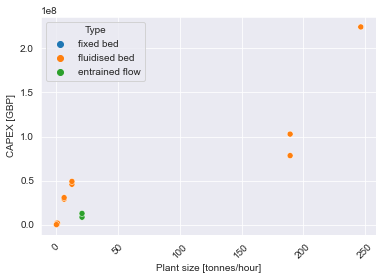

In [9]:
# Plot original data
sns.scatterplot(data=df_source, x="Plant size [tonnes/hour]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [tonnes/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


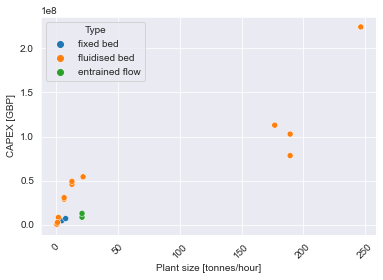

In [10]:
# Plot updated data
sns.scatterplot(data=df, x="Plant size [tonnes/hour]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [tonnes/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


### Plot small plant data set

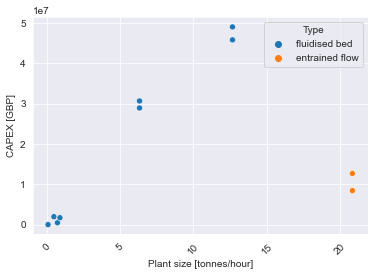

In [11]:
# Plot original data
sns.scatterplot(data=df_source[df_source["Plant size [tonnes/hour]"] < 50], x="Plant size [tonnes/hour]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [tonnes/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


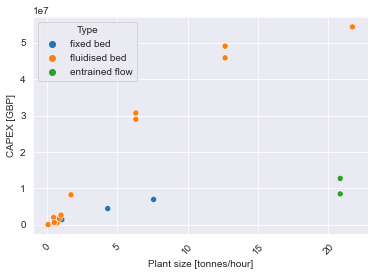

In [12]:
# Plot updated data after filling in missing values
sns.scatterplot(data=df[df["Plant size [tonnes/hour]"] < 50], x="Plant size [tonnes/hour]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [tonnes/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


### Fluidised bed data only

C:\Users\2270577A\AppData\Local\Temp\ipykernel_8760\3608126819.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=df[df["Plant size [tonnes/hour]"] < 50][df["Type"] == "fluidised bed"],


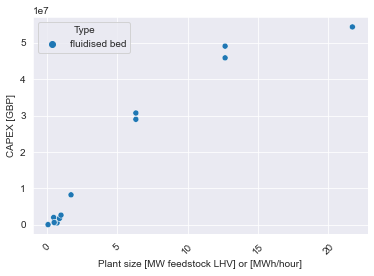

In [13]:
# Plot fluidised bed data only
sns.scatterplot(data=df[df["Plant size [tonnes/hour]"] < 50][df["Type"] == "fluidised bed"],
                x="Plant size [tonnes/hour]",
                y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MW feedstock LHV] or [MWh/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


C:\Users\2270577A\AppData\Local\Temp\ipykernel_8760\1112886372.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=df[df["Plant size [tonnes/hour]"] < 50][df["Type"] == "fluidised bed"],


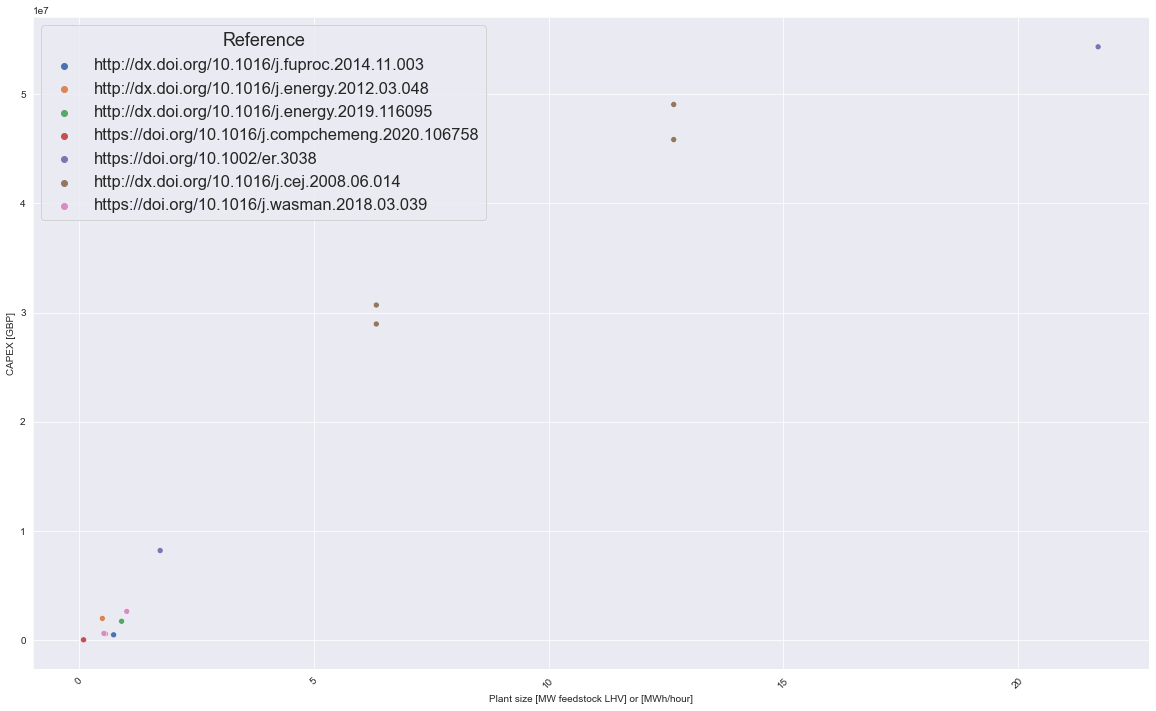

In [14]:
# Plot fluidised bed data only - by reference
fig, ax = plt.subplots(figsize=(20,12))
sns.set(font_scale=1.5)
sns.scatterplot(data=df[df["Plant size [tonnes/hour]"] < 50][df["Type"] == "fluidised bed"],
                x="Plant size [tonnes/hour]",
                y=currency_and_CEPCI_scaled_label, hue="Reference")
plt.xlabel("Plant size [MW feedstock LHV] or [MWh/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()
sns.set(font_scale=1.0)


Very clear trend visible now and from many different references - so wouldn't be that it's just reliant on a few references.


### Similar analysis for other two reactor types

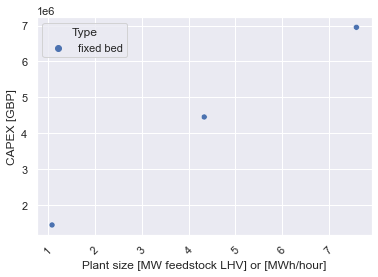

In [15]:
# Plot fixed bed data only
sns.scatterplot(data=df[df["Type"] == "fixed bed"],
                x="Plant size [tonnes/hour]",
                y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MW feedstock LHV] or [MWh/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


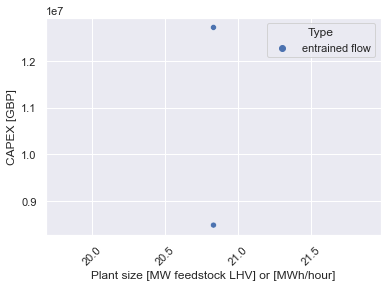

In [16]:
# Plot entrained flow reactor data only
sns.scatterplot(data=df[df["Type"] == "entrained flow"],
                x="Plant size [tonnes/hour]",
                y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MW feedstock LHV] or [MWh/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


Fixed bed and entrained flow reactor data are both from one reference respectively.
- Fixed bed data could be used to model a pretty linear relationship based on that one reference - would realistically only be suitable for a certain data range though.
- Entrained flow data hard to make use of . Two data points - but one is higher because it also included gas cleaning - both from the same reference.

### Plot data using MWel as unit

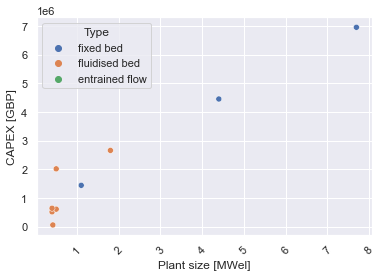

In [17]:
# Plot original data
sns.scatterplot(data=df_source, x="Plant size [MWel]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MWel]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


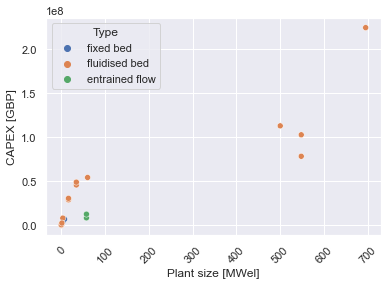

In [18]:
# Plot updated data
sns.scatterplot(data=df, x="Plant size [MWel]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MWel]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


### Plot small plant data set

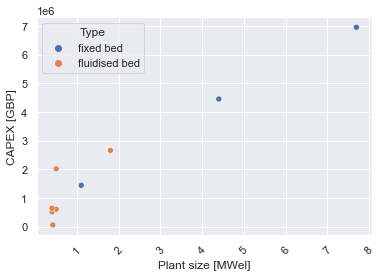

In [19]:
# Plot original data
sns.scatterplot(data=df_source[df_source["Plant size [MWel]"] < 200], x="Plant size [MWel]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MWel]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


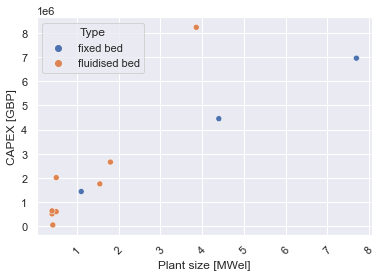

In [20]:
# Plot updated data after filling in missing values - small size
sns.scatterplot(data=df[df["Plant size [MWel]"] < 10], x="Plant size [MWel]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MWel]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


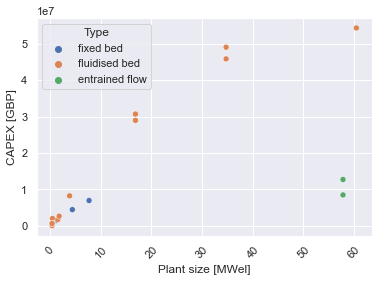

In [21]:
# Plot updated data after filling in missing values - medium size
sns.scatterplot(data=df[df["Plant size [MWel]"] < 100], x="Plant size [MWel]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MWel]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


### Plot data using [MW feedstock LHV] or [MWh/hour] as unit


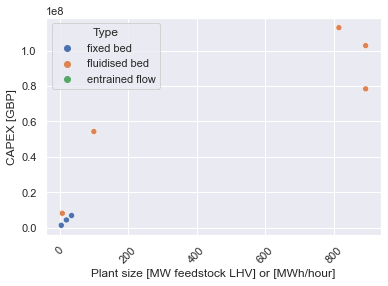

In [22]:
# Plot original data
sns.scatterplot(data=df_source, x="Plant size [MW feedstock LHV] or [MWh/hour]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MW feedstock LHV] or [MWh/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


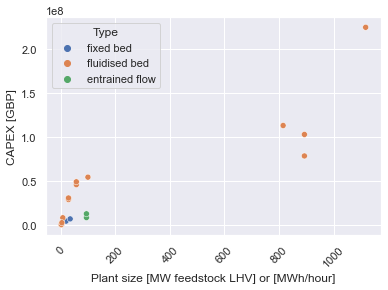

In [23]:
# Plot updated data after filling in missing values
sns.scatterplot(data=df, x="Plant size [MW feedstock LHV] or [MWh/hour]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MW feedstock LHV] or [MWh/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


### Plot small plant data set

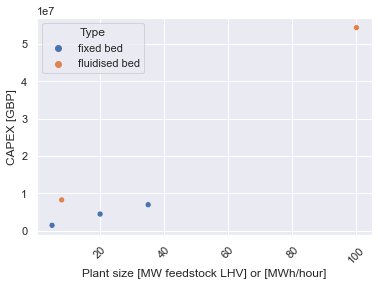

In [24]:
# Plot original data
sns.scatterplot(data=df_source[df_source["Plant size [MW feedstock LHV] or [MWh/hour]"] < 200], x="Plant size [MW feedstock LHV] or [MWh/hour]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MW feedstock LHV] or [MWh/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

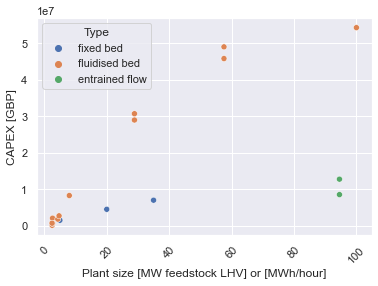

In [25]:
# Plot updated data after filling in missing values
sns.scatterplot(data=df[df["Plant size [MW feedstock LHV] or [MWh/hour]"] < 200], x="Plant size [MW feedstock LHV] or [MWh/hour]", y=currency_and_CEPCI_scaled_label, hue="Type")
plt.xlabel("Plant size [MW feedstock LHV] or [MWh/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

### Continue analysis with tonnes/hour as unit
- most complete data set compared to other 2 size units
- conversion from other system sizes has the fewest warnings about values not being in correct range for conversion

### Create Graph which differentiates between substituted data points and original data points

In [26]:
# Add new column for plotting which indicates whether data point is filled in or not

substituted_data = []
for value in df_source["Plant size [tonnes/hour]"]:
    if math.isnan(value):
        substituted_label = "Substituted"
    else:
        substituted_label = "Original"
    substituted_data.append(substituted_label)

# Add column to df
df["Plant size [tonnes/hour] substituted label"] = substituted_data
df


,Process Reference,Gas Cleaning Included,Power Generation Included,Type,CAPEX,Currency,Plant size [tonnes/hour],Plant size [MW feedstock LHV] or [MWh/hour],Plant size [MWth],Plant size [MWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020,Plant size [tonnes/hour] substituted label
0,Gasification unit + gas cleaning,True,False,fixed bed,1721500,EUR,1.079255,5.000000,NaN,1.100000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,1.387782e+06,1.439333e+06,Substituted
1,Gasification unit + gas cleaning,True,False,fixed bed,5324000,EUR,4.335076,20.000000,NaN,4.400000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,4.291926e+06,4.451355e+06,Substituted
2,Gasification unit + gas cleaning,True,False,fixed bed,8316000,EUR,7.590898,35.000000,NaN,7.700000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,6.703917e+06,6.952943e+06,Substituted
3,Bubbling fluidised bed gasifier,False,False,fluidised bed,660000,EUR,0.740000,2.474119,0.4,0.400000,2015,Italy,NaN,NaN,calculated plant size in tonnes/hour from 5320...,http://dx.doi.org/10.1016/j.fuproc.2014.11.003,4.793188e+05,5.143552e+05,Original
4,Bubbling fluidised bed air gasifier + power pr...,True,True,fluidised bed,2430000,EUR,0.500000,2.634579,NaN,0.500000,2012,Italy,NaN,NaN,plant input also quoted as 3840 tonnes/year,http://dx.doi.org/10.1016/j.energy.2012.03.048,1.971294e+06,2.014794e+06,Original
5,Biomass gasifier with rankine cycle + all aces...,True,True,fluidised bed,2073183,EUR,0.910000,4.314082,NaN,1.546683,2019,Mexico,NaN,NaN,"total costs, including installation, planning,...",http://dx.doi.org/10.1016/j.energy.2019.116095,1.818665e+06,1.754930e+06,Original
6,Gasifier equipment cost only,False,False,fluidised bed,72380,USD,0.100000,2.504606,NaN,0.419000,2020,USA,NaN,NaN,This represents only 2.5% of the BIGCC plant's...,https://doi.org/10.1016/j.compchemeng.2020.106758,5.642775e+04,5.642775e+04,Original
7,Indirect gasifier,False,False,fluidised bed,8000000,EUR,1.730419,8.000000,NaN,3.858866,2003,Europe,0.72,3.800,Base equipment cost would be quoted CAPEX scal...,https://doi.org/10.1002/er.3038,5.536412e+06,8.228871e+06,Substituted
8,Indirect gasifier with gas cleaning (17% of to...,True,False,fluidised bed,52816426,EUR,21.699460,100.000000,NaN,60.440891,2003,Europe,NaN,NaN,83% of this is the cost for the gasifier; 17% ...,https://doi.org/10.1002/er.3038,3.655169e+07,5.432745e+07,Substituted
9,Entrained flow steam Gasification,False,False,entrained flow,14933333,USD,20.833333,94.571072,NaN,57.795714,2007,USA,0.60,2.310,CAPEX for cleaning equipment has been removed;...,Process Design and Economics for Conversion of...,7.459688e+06,8.483371e+06,Original


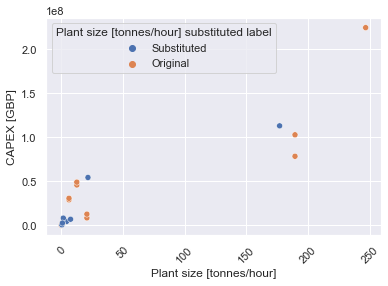

In [27]:
# Plot updated data
sns.scatterplot(data=df, x="Plant size [tonnes/hour]", y=currency_and_CEPCI_scaled_label, hue="Plant size [tonnes/hour] substituted label")
plt.xlabel("Plant size [tonnes/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


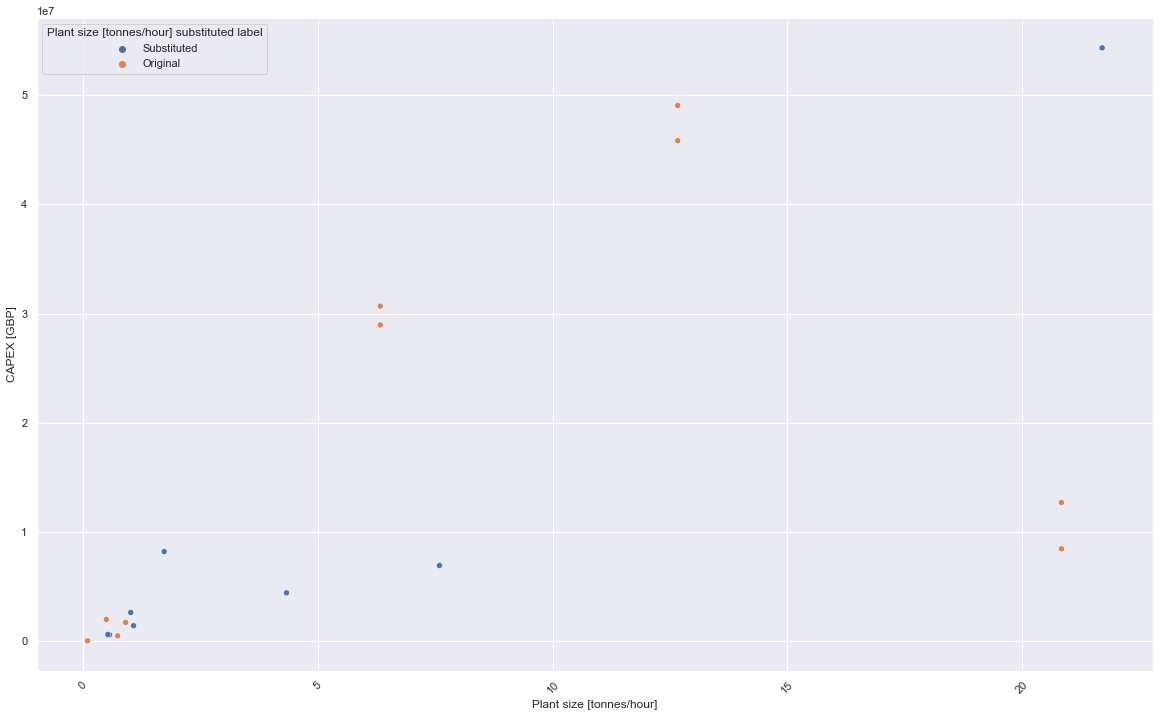

In [28]:
# Plot data for smaller systems only
fig, ax = plt.subplots(figsize=(20,12))
sns.scatterplot(data=df[df["Plant size [tonnes/hour]"] < 50], x="Plant size [tonnes/hour]", y=currency_and_CEPCI_scaled_label, hue="Plant size [tonnes/hour] substituted label")
plt.xlabel("Plant size [tonnes/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


### Create Graph which differentiates between cleaning and power generation included or not

In [29]:
# Add new column for plotting which indicates whether gas cleaning and power generation are included in cost data

cleaning_and_power_generation = []
for row_no in df.index:
    gas_cleaning_cond = False
    power_gen_cond = False
    if df["Gas Cleaning Included"][row_no] and df["Power Generation Included"][row_no]:
        label = "Gas Cleaning + Power Generation"
    elif df["Gas Cleaning Included"][row_no] and not df["Power Generation Included"][row_no]:
        label = "Gas Cleaning"
    elif not df["Gas Cleaning Included"][row_no] and df["Power Generation Included"][row_no]:
        label = "Power Generation"
    else:
        label = "Gasification only"

    cleaning_and_power_generation.append(label)

# Add cleaning and power generation descriptors to df
df["Cleaning and Power Generation"] = cleaning_and_power_generation
df

,Process Reference,Gas Cleaning Included,Power Generation Included,Type,CAPEX,Currency,Plant size [tonnes/hour],Plant size [MW feedstock LHV] or [MWh/hour],Plant size [MWth],Plant size [MWel],Reference Year,Country,Scaling factor,Balance of plant costs/Overall installation factor,Comments,Reference,CAPEX_GBP,CAPEX_GBP_CEPCI_2020,Plant size [tonnes/hour] substituted label,Cleaning and Power Generation
0,Gasification unit + gas cleaning,True,False,fixed bed,1721500,EUR,1.079255,5.000000,NaN,1.100000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,1.387782e+06,1.439333e+06,Substituted,Gas Cleaning
1,Gasification unit + gas cleaning,True,False,fixed bed,5324000,EUR,4.335076,20.000000,NaN,4.400000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,4.291926e+06,4.451355e+06,Substituted,Gas Cleaning
2,Gasification unit + gas cleaning,True,False,fixed bed,8316000,EUR,7.590898,35.000000,NaN,7.700000,2014,Poland,NaN,NaN,calculated 3 instances from equations given in...,https://doi.org/10.1016/j.energy.2014.01.015,6.703917e+06,6.952943e+06,Substituted,Gas Cleaning
3,Bubbling fluidised bed gasifier,False,False,fluidised bed,660000,EUR,0.740000,2.474119,0.4,0.400000,2015,Italy,NaN,NaN,calculated plant size in tonnes/hour from 5320...,http://dx.doi.org/10.1016/j.fuproc.2014.11.003,4.793188e+05,5.143552e+05,Original,Gasification only
4,Bubbling fluidised bed air gasifier + power pr...,True,True,fluidised bed,2430000,EUR,0.500000,2.634579,NaN,0.500000,2012,Italy,NaN,NaN,plant input also quoted as 3840 tonnes/year,http://dx.doi.org/10.1016/j.energy.2012.03.048,1.971294e+06,2.014794e+06,Original,Gas Cleaning + Power Generation
5,Biomass gasifier with rankine cycle + all aces...,True,True,fluidised bed,2073183,EUR,0.910000,4.314082,NaN,1.546683,2019,Mexico,NaN,NaN,"total costs, including installation, planning,...",http://dx.doi.org/10.1016/j.energy.2019.116095,1.818665e+06,1.754930e+06,Original,Gas Cleaning + Power Generation
6,Gasifier equipment cost only,False,False,fluidised bed,72380,USD,0.100000,2.504606,NaN,0.419000,2020,USA,NaN,NaN,This represents only 2.5% of the BIGCC plant's...,https://doi.org/10.1016/j.compchemeng.2020.106758,5.642775e+04,5.642775e+04,Original,Gasification only
7,Indirect gasifier,False,False,fluidised bed,8000000,EUR,1.730419,8.000000,NaN,3.858866,2003,Europe,0.72,3.800,Base equipment cost would be quoted CAPEX scal...,https://doi.org/10.1002/er.3038,5.536412e+06,8.228871e+06,Substituted,Gasification only
8,Indirect gasifier with gas cleaning (17% of to...,True,False,fluidised bed,52816426,EUR,21.699460,100.000000,NaN,60.440891,2003,Europe,NaN,NaN,83% of this is the cost for the gasifier; 17% ...,https://doi.org/10.1002/er.3038,3.655169e+07,5.432745e+07,Substituted,Gas Cleaning
9,Entrained flow steam Gasification,False,False,entrained flow,14933333,USD,20.833333,94.571072,NaN,57.795714,2007,USA,0.60,2.310,CAPEX for cleaning equipment has been removed;...,Process Design and Economics for Conversion of...,7.459688e+06,8.483371e+06,Original,Gasification only


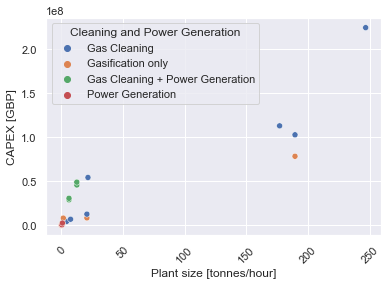

In [30]:
# Plot updated data
sns.scatterplot(data=df, x="Plant size [tonnes/hour]", y=currency_and_CEPCI_scaled_label, hue="Cleaning and Power Generation")
plt.xlabel("Plant size [tonnes/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


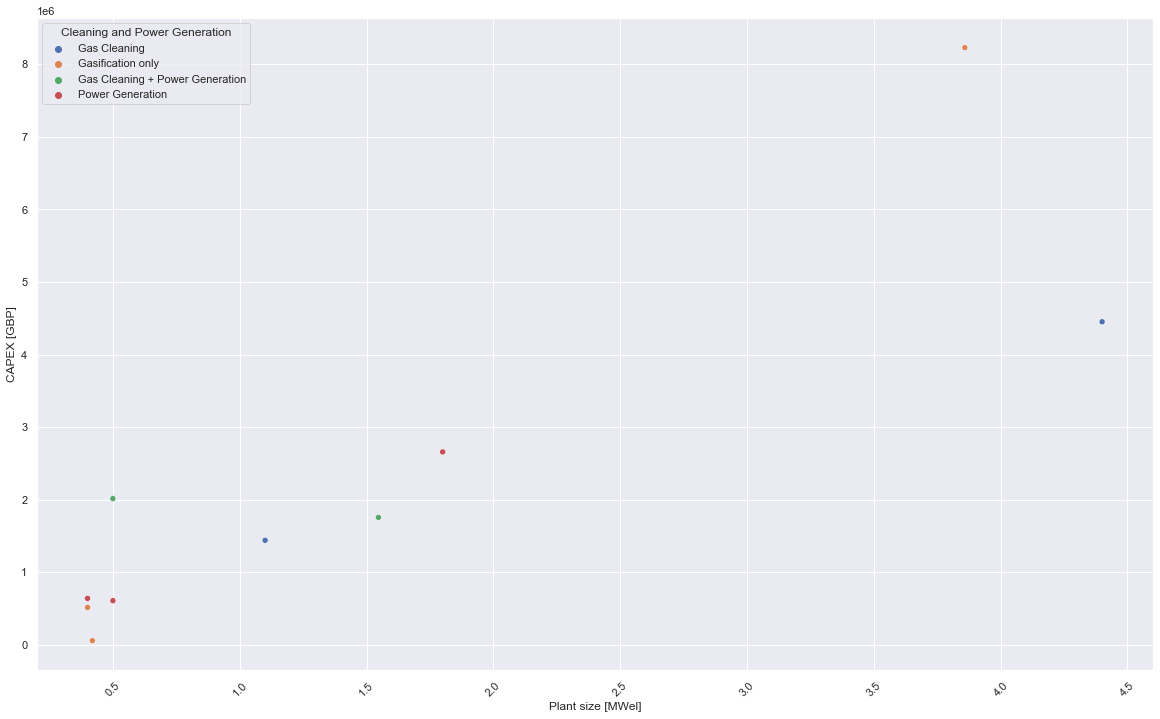

In [31]:
# Plot data for smaller systems only
fig, ax = plt.subplots(figsize=(20,12))
sns.scatterplot(data=df[df["Plant size [MWel]"] < 5], x="Plant size [MWel]", y=currency_and_CEPCI_scaled_label, hue="Cleaning and Power Generation")
plt.xlabel("Plant size [MWel]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()

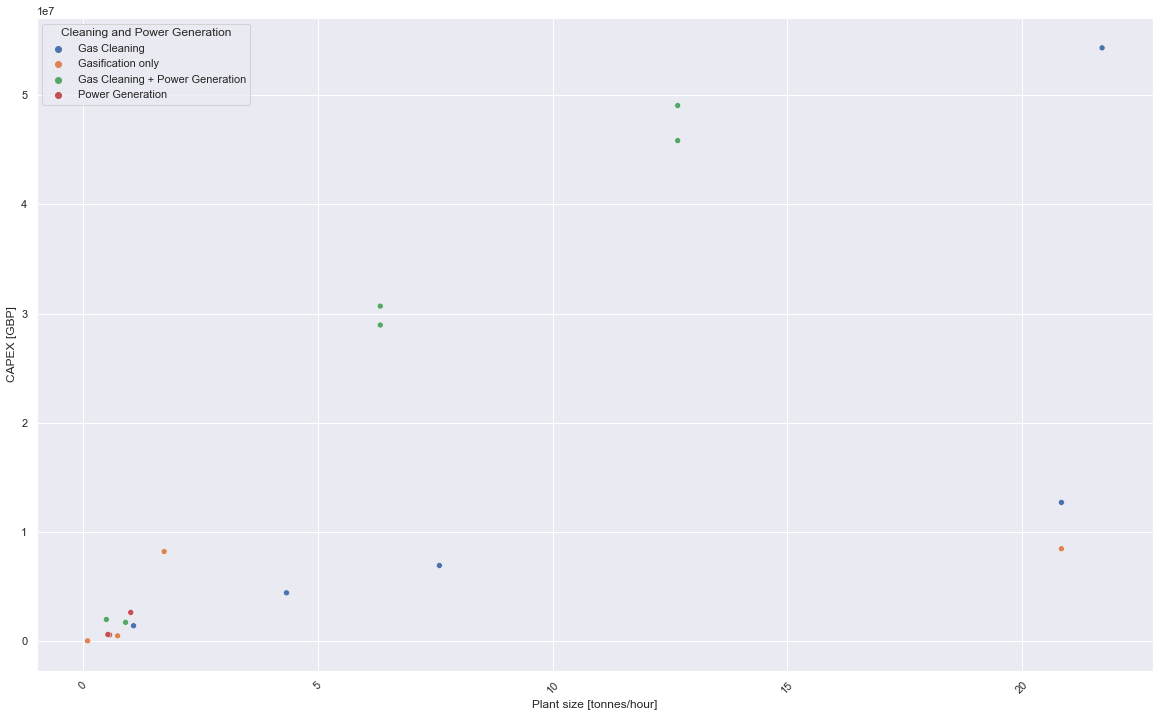

In [32]:
# Plot data for smaller systems only
fig, ax = plt.subplots(figsize=(20,12))
sns.scatterplot(data=df[df["Plant size [tonnes/hour]"] < 50], x="Plant size [tonnes/hour]", y=currency_and_CEPCI_scaled_label, hue="Cleaning and Power Generation")
plt.xlabel("Plant size [tonnes/hour]")
plt.ylabel("CAPEX [GBP]")
plt.xticks(rotation=45)
plt.show()


C:\Users\2270577A\AppData\Local\Temp\ipykernel_8760\2923443921.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  model_results_sub50_fluidised_only = get_polynomial_model_and_performance(dataframe=df[df["Plant size [tonnes/hour]"] < 50][df["Type"] == "fluidised bed"],


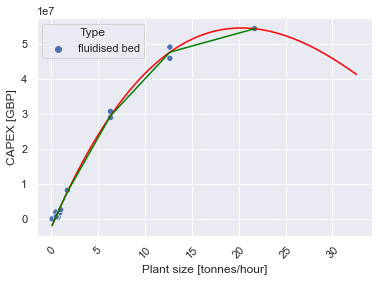

In [33]:
model_results_sub50_fluidised_only = get_polynomial_model_and_performance(dataframe=df[df["Plant size [tonnes/hour]"] < 50][df["Type"] == "fluidised bed"],
                                     x_data_label="Plant size [tonnes/hour]",
                                     y_data_label=currency_and_CEPCI_scaled_label,
                                     plot_x_label="Plant size [tonnes/hour]",
                                     plot_y_label="CAPEX [GBP]",
                                     plot_hue_label="Type",
                                     display_fit=True)


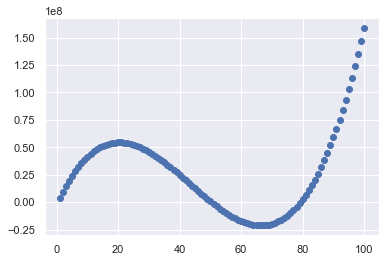

In [36]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
# Make predictions
test_x_values = np.linspace(1,100,100)
predictions = []
for value  in test_x_values:
    prediction = model_results_sub50_fluidised_only["model"].predict(PolynomialFeatures(
        degree=model_results_sub50_fluidised_only["degree"], include_bias=False).
                                                           fit_transform(np.array(value).reshape(-1, 1)))
    predictions.append(prediction)

fig, ax = plt.subplots()
ax.scatter(test_x_values, predictions)
plt.show()
